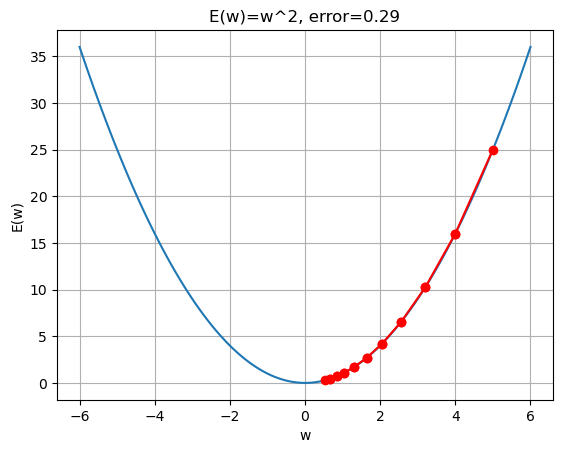

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# 學習率
alpha = 0.1

# 初始位置
w_init = 5

x = np.arange(-6, 6.1, 0.1)
y = x**2
plt.plot(x, y)

plt.xlabel('w')
plt.ylabel('E(w)')
plt.title('E(w)=w^2')
plt.grid(True)

w_old = 0; w_new = 0
for i in range(1, 11):
    if i == 1:
        w_old = w_init
    else:
        w_old = w_new
    
    # (2*w_old) 為二次函數的的微分式
    w_new = w_old - alpha * (2*w_old)
    
    plt.plot((w_old, w_new), (w_old**2, w_new**2), 'ro-')
    plt.title('E(w)=w^2, error=' + '{:.2f}'.format(abs(w_new**2)))

Text(0, 0.5, 'f(x)')

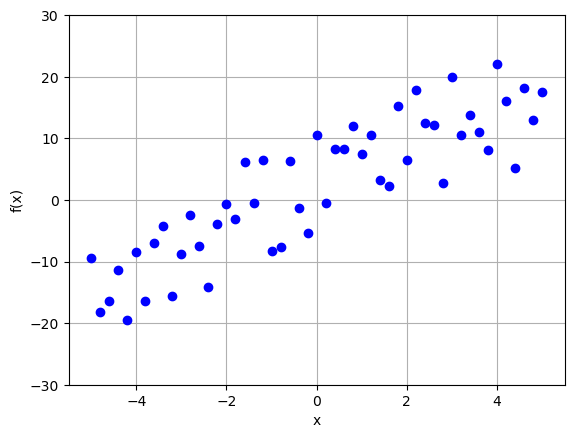

In [11]:
def getdata(n):
    # n為產生資料量

    # 給定一個固定的參數，再加上隨機變動值作為雜訊
    # 其雜訊變動值介於 -10 ～ 10 之間
    x = np.arange(-5, 5.1, 10/(n-1))
    y = 3*x + 2 + (np.random.rand(len(x))-0.5)*20
    return x, y

# =============================================== #
# 產生一組資料，共51筆。
x, y = getdata(51)

# 繪圖
plt.plot(x, y, 'bo')
plt.grid('true')
plt.ylim(-30, 30)
plt.xlabel('x')
plt.ylabel('f(x)')


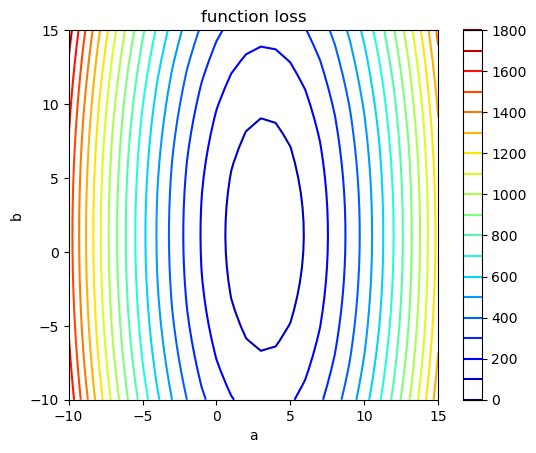

In [12]:
# 給定隨機種子
np.random.seed(1)

# =============================================== #
# functions

def getdata(n):
    # n為產生資料量

    # 給定一個固定的參數，再加上隨機變動值作為雜訊
    # 其雜訊變動值介於 -10 ～ 10 之間
    x = np.arange(-5, 5.1, 10/(n-1))
    y = 3*x + 2 + (np.random.rand(len(x))-0.5)*20
    return x, y

def plot_error(x, y):
# 繪製誤差網格圖 
   
    a = np.arange(-10, 16, 1)
    b = np.arange(-10, 16, 1)
    mesh = np.meshgrid(a, b)

    sqr_err = 0
    for xs, ys in zip(x, y):
        sqr_err += ((mesh[0]*xs + mesh[1]) - ys) ** 2
    loss = sqr_err/len(x)
    
    plt.contour(mesh[0], mesh[1], loss, 20, cmap=plt.cm.jet)
    plt.xlabel('a')
    plt.ylabel('b')
    plt.axis('scaled')
    plt.title('function loss')
    plt.colorbar()

# =============================================== #
# 產生一組資料
x, y = getdata(51)
plot_error(x, y)

In [13]:
def gradient(a, b, x, y):   
    grad_a = 2 * np.mean((a*x + b - y) * (x))
    grad_b = 2 * np.mean((a*x + b - y) * (1))
    return grad_a, grad_b
def update(a, b, grad_a, grad_b, alpha):
    a_new = a - alpha * grad_a
    b_new = b - alpha * grad_b
    return a_new, b_new

def mse(a, b, x, y):
    sqr_err = ((a*x + b) - y) ** 2
    loss = np.mean(sqr_err)
    return loss

In [14]:
class my_BGD:    
    def __init__(self, a, b, x, y, alpha):
        self.a = a
        self.b = b
        self.x = x
        self.y = y
        self.alpha = alpha
        
        self.a_old = a
        self.b_old = b
        
        self.loss = None
    
    # Loss function
    def mse(self):
        sqr_err = ((self.a*self.x + self.b) - self.y) ** 2
        return np.mean(sqr_err)
    
    def gradient(self):
        grad_a = 2 * np.mean((self.a*self.x + self.b - self.y) * (self.x))
        grad_b = 2 * np.mean((self.a*self.x + self.b - self.y) * (1))
        return grad_a, grad_b

    def update(self):
        # 計算梯度
        grad_a, grad_b = self.gradient()
        
        # 梯度更新
        self.a_old = self.a
        self.b_old = self.b
        self.a = self.a - self.alpha * grad_a
        self.b = self.b - self.alpha * grad_b
        self.loss = self.mse()

iter=1, loss=801.79
iter=2, loss=455.32
iter=3, loss=266.56
iter=4, loss=163.50
iter=5, loss=107.07
iter=6, loss=76.09
iter=7, loss=59.02
iter=8, loss=49.58
iter=9, loss=44.34
iter=10, loss=41.41


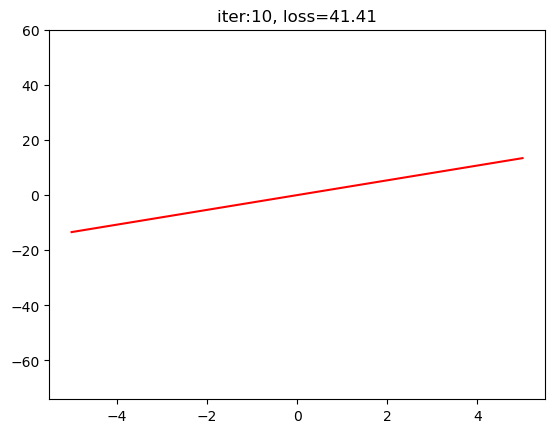

In [15]:
# 初始設定
alpha = 0.1

# 從 -9 開始，能看得更明顯
a = -9; b = -9

# 類別 my_BGD 初始化
mlclass = my_BGD(a, b, x, y, alpha)

# 畫張圖看一下
yp = a*x + b
h, = plt.plot(x, yp, 'r-')
plt.title('Initial, loss='+'{:.2f}'.format(mlclass.mse()))

# 開始迭代 10 次
for i in range(1, 11):
    mlclass.update()
    print('iter='+str(i)+', loss='+'{:.2f}'.format(mlclass.loss))

    # 再畫張圖來看看
    yp = mlclass.a*x + mlclass.b

    h.remove()
    h, = plt.plot(x, yp, 'r-')
    plt.title('iter:'+str(i)+', loss='+'{:.2f}'.format(mlclass.loss))

iter=1, loss=801.79
iter=2, loss=455.32
iter=3, loss=266.56
iter=4, loss=163.50
iter=5, loss=107.07
iter=6, loss=76.09
iter=7, loss=59.02
iter=8, loss=49.58
iter=9, loss=44.34
iter=10, loss=41.41


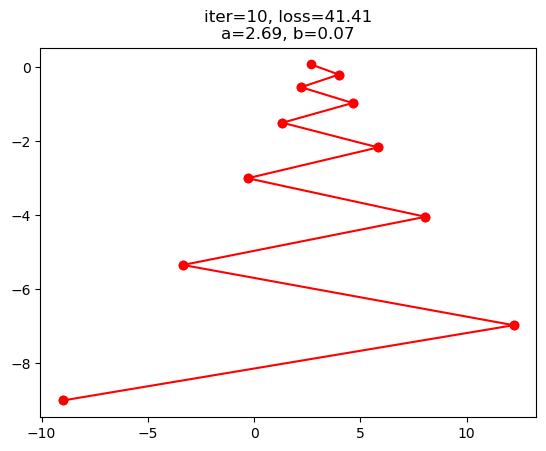

In [16]:
# 初始設定
alpha = 0.1

# 從 -9 開始，能看得更明顯
a = -9; b = -9

# 初始化
mlclass = my_BGD(a, b, x, y, alpha)

plt.plot(a, b, 'ro-')
plt.title('Initial, loss='+'{:.2f}'.format(mlclass.mse())+'\na='+
          '{:.2f}'.format(a)+', b='+'{:.2f}'.format(b))

# 開始迭代
for i in range(1, 11):
    mlclass.update()
    print('iter='+str(i)+', loss='+'{:.2f}'.format(mlclass.loss))
    
    plt.plot((mlclass.a_old, mlclass.a), (mlclass.b_old, mlclass.b), 'ro-')
    plt.title('iter='+str(i)+', loss='+'{:.2f}'.format(mlclass.loss)+'\na='+
              '{:.2f}'.format(mlclass.a)+', b='+'{:.2f}'.format(mlclass.b))

iter=1, loss=801.79
iter=2, loss=455.32
iter=3, loss=266.56
iter=4, loss=163.50
iter=5, loss=107.07
iter=6, loss=76.09
iter=7, loss=59.02
iter=8, loss=49.58
iter=9, loss=44.34
iter=10, loss=41.41


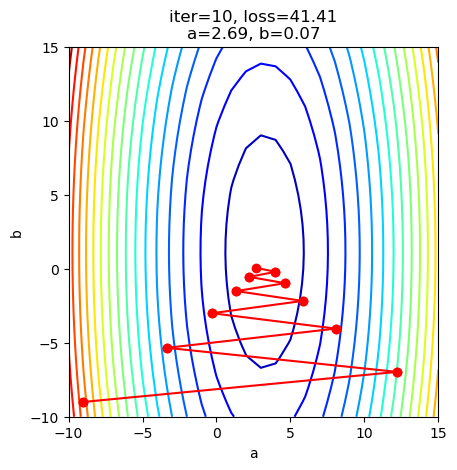

In [17]:
# -*- coding: utf-8 -*-
# 說明：誤差空間的收斂過程
#
# Shayne, 2019.09.10

import numpy as np
import matplotlib.pyplot as plt

# 給定隨機種子，使每次執行結果保持一致
np.random.seed(1)
    
def getdata(n):
    # n為產生資料量
    x = np.arange(-5, 5.1, 10/(n-1))
    # 給定一個固定的參數，再加上隨機變動值作為雜訊，其變動值介於 +-10 之間
    y = 3*x + 2 + (np.random.rand(len(x))-0.5)*20
    return x, y

def plot_error(x, y):
    a = np.arange(-10, 16, 1)
    b = np.arange(-10, 16, 1)
    mesh = np.meshgrid(a, b)

    sqr_err = 0
    for xs, ys in zip(x, y):
        sqr_err += ((mesh[0]*xs + mesh[1]) - ys) ** 2
    loss = sqr_err/len(x)
    
    plt.contour(mesh[0], mesh[1], loss, 20, cmap=plt.cm.jet)
    plt.xlabel('a')
    plt.ylabel('b')
    plt.axis('scaled')
    plt.title('function loss')

class my_BGD:    
    def __init__(self, a, b, x, y, alpha):
        self.a = a
        self.b = b
        self.x = x
        self.y = y
        self.alpha = alpha
        
        self.a_old = a
        self.b_old = b
        
        self.loss = self.mse()
    
    # Loss function
    def mse(self):
        sqr_err = ((self.a*self.x + self.b) - self.y) ** 2
        return np.mean(sqr_err)
    
    def gradient(self):
        grad_a = 2 * np.mean((self.a*self.x + self.b - self.y) * (self.x))
        grad_b = 2 * np.mean((self.a*self.x + self.b - self.y) * (1))
        return grad_a, grad_b

    def update(self):
        # 計算梯度
        grad_a, grad_b = self.gradient()
        
        # 梯度更新
        self.a_old = self.a
        self.b_old = self.b
        self.a = self.a - self.alpha * grad_a
        self.b = self.b - self.alpha * grad_b
        self.loss = self.mse()

# =============================================== #
# 隨機產生一組資料
x, y = getdata(51)

# 繪製誤差空間底圖
plot_error(x, y)

# =============================================== #

# 初始設定
alpha = 0.1

# 從 -9 開始，能看得更明顯
a = -9; b = -9

# 初始化
mlclass = my_BGD(a, b, x, y, alpha)

plt.plot(a, b, 'ro-')
plt.title('Initial, loss='+'{:.2f}'.format(mlclass.loss)+'\na='+
          '{:.2f}'.format(a)+', b='+'{:.2f}'.format(b))

# 開始迭代
for i in range(1, 11):
    mlclass.update()
    print('iter='+str(i)+', loss='+'{:.2f}'.format(mlclass.loss))
    
    plt.plot((mlclass.a_old, mlclass.a), (mlclass.b_old, mlclass.b), 'ro-')
    plt.title('iter='+str(i)+', loss='+'{:.2f}'.format(mlclass.loss)+'\na='+
              '{:.2f}'.format(mlclass.a)+', b='+'{:.2f}'.format(mlclass.b))